In [ ]:
#Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
#Ms=log10(Ad/Ts)+1.66log10(D)+3.5
#Constants
Ts=20 # Period of measurement fixed to 20 sec
ASDn=1e-7 #Amplitude of the noise in m/s^{2}*Hz^{0.5}
SNR=3 #Detection Limit Defined by SNR
ASDLimit=ASDn*SNR

DOY=365 #1 year on Earth
Tobs=1 #Total observation time

In [ ]:
MsList = np.arange(1.0,7.5,0.5) #List of Ms to calculate Ms=1.0-7.0
DList = np.arange(5,180,0.5) #List of distance to calculate 5 to 180 degrees
f0=1/Ts #Central Frequency
omega=2*math.pi*f0 #Central Frequency in radian



Text(0.5, 1.0, 'Surface Wave Amplitude for Ms=1.0-7.0')

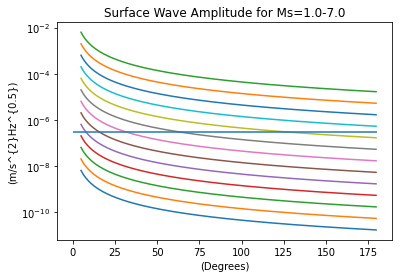

In [ ]:
for Ms in MsList:
    AdASD=[]
    for D in DList:
        K=Ms-3.3 - 1.66*math.log10(D)       
        AdASD.append(Ts * pow(10,K)*1e-6*omega*omega/np.sqrt(0.23*f0)) #multiplied by omega^2 to go to acc, then devided by the band width
    
    plt.semilogy(DList,AdASD)
        
plt.hlines(y=ASDLimit,xmin=0,xmax=180)
plt.xlabel('(Degrees)')
plt.ylabel('(m/s^{2}Hz^{0.5})')
plt.title('Surface Wave Amplitude for Ms=1.0-7.0')


1.0 19844376.154088397 1.8393120406801078e-05
1.5 4957192.78251332 7.363038235824737e-05
2.0 1238392.1286931909 0.00029473701547599873
2.5 309440.17883774196 0.0011795494734101464
3.0 77389.17012078824 0.004716422200035375
3.5 19423.429725822152 0.018791737872882297
4.0 4944.973266561901 0.07381233028460316
4.5 1333.8019736397723 0.2736538160938257
5.0 458.8728141052358 0.7954273793964455
5.5 365.0 1.0
6.0 365.0 1.0
6.5 365.0 1.0
7.0 365.0 1.0


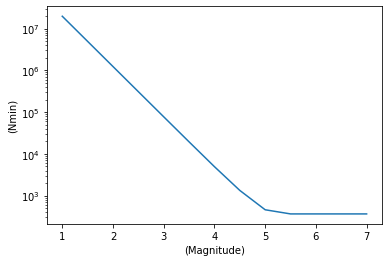

In [ ]:
AdLimit=ASDLimit*1e6/omega/omega*np.sqrt(0.23*f0) #starting from micrometer acc/Hz^{0.5}, divided by omega^2 to go to Displacement and multiplied with the bandwidth to go to displacement

NminList=[]
AList=[]
for Ms in MsList:
    K=(Ms-3.3-math.log10(AdLimit/Ts))/1.66
    Dlim=pow(10,K)
    if Dlim >= 180: #if the distance is larger than 180, the distance is fixed to 180 degrees
        Dlim=180
    DegreeLim=Dlim*(math.pi/180)
    A=(1-math.cos(DegreeLim))/2
    NminList.append(1/A*(DOY/Tobs))
    print(Ms,1/A*(DOY/Tobs),A)
      
plt.ylabel('(Nmin)')
plt.xlabel('(Magnitude)')
plt.semilogy(MsList,NminList,"-")
#    print(Ms,Nmin)
plt.savefig('Lander_SurfaceWaveMs_Nmin.png', dpi=300)